In [ ]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import seaborn as sns; sns.set(color_codes=True)

LRTAnalysis = uproot.open("/data/newhouse/LRT/batch/testing/testing_21p0_v7_doR3LargeD0/TTBAR/LRTAnalysis_output.root")

In [23]:

event_branches = ['nTracks',
                  'nTruth',
                  'nTracksAccept',
                  'nTruthAccept',
                  'mu',
                  'event',
                  'mcid',]
event_tree = LRTAnalysis['Trees/eventTree'].pandas.df(event_branches)

truth_branches=[
'truth_link',
'truth_type',
'truth_nSiHits',
'truth_nPixHits',
'truth_status',
'truth_fidPass',
'truth_r',
'truth_phi',
'truth_dphi',
'truth_z',
'truth_pt',
'truth_qOp',
'truth_d0',
'truth_z0',
'truth_eta',
'truth_barcode',
'truth_charge',
'truth_pdgId',
'truth_parentIdLLP',
'truth_parentId',
'truth_VSIorigin',
]
truth_tree = LRTAnalysis['Trees/eventTree'].pandas.df(truth_branches)

track_branches = [
'isFake',
'isSignal',
'truth_origin',
'index',
'truth_matchProb',
'pt',
'qOp',
'eta',
'd0',
'z0',
'link',
'isLRTrack',
'radiusOdFirstHit',
'nSiHits',
'nPixHits',
'nTRTHits',
'nPixHoles',
'nSiHoles',
'nPixShared',
'nSiShared',
'nContribPixLay',
'nPixOutliers',
'nSiOutliers',
'nTRTOutliers',
'chiSquared',
'nDOF',
'passLoose',
'passTight',
]
track_tree = LRTAnalysis['Trees/eventTree'].pandas.df(track_branches)


In [24]:
event_tree = LRTAnalysis['Trees/eventTree'].pandas.df(event_branches+['isLRTrack'], flatten=False)
event_tree['nTracksLRT'] = event_tree.isLRTrack.apply(sum)
event_tree['nTracksStandard'] = event_tree.nTracksAccept - event_tree.nTracksLRT

Text(0.02, 0.72, '$\\sqrt{s}$ = 13TeV')

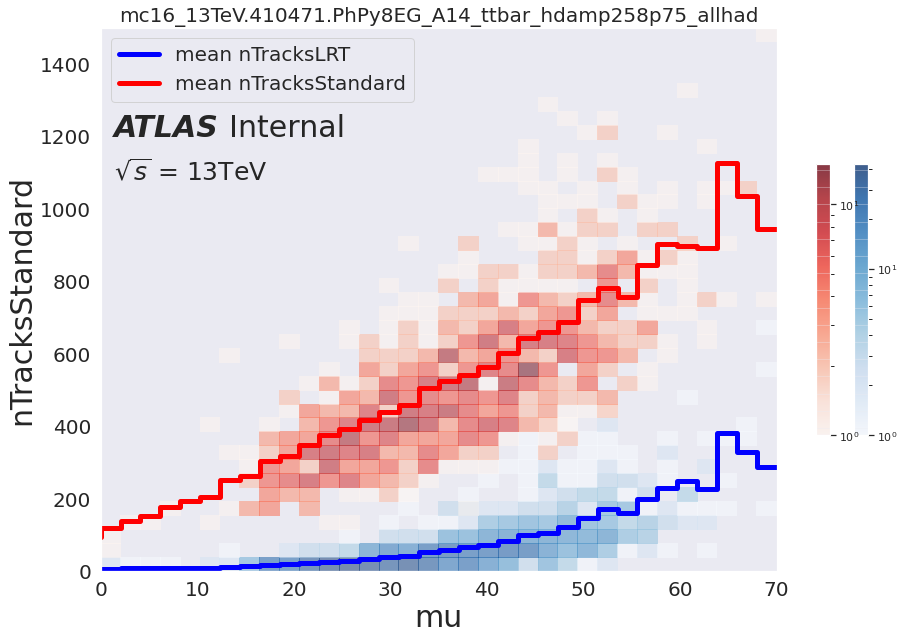

In [175]:


    
def plot2d(df, var_a, var_b, ax=None, nentries=1000, bins=[10,10], linecolor='darkred', histcolor='Reds'):
    
    if ax is None:
        fig = plt.figure(figsize=[15,10])
        ax = fig.gca()
    
    h, xedges, yedges, image = ax.hist2d(x=df[0:nentries][var_a], 
                                         y=df[0:nentries][var_b], 
                                         bins=bins,
                                         norm=colors.LogNorm(),
                                        alpha=0.5,
                                        cmap=histcolor,
                                        )
    mu_bins = np.linspace(0,70,35)
    mean_tracks = []
    for i in mu_bins:
        mean_tracks.append(event_tree.query(f'{var_a} > {i} & mu < {i+1}')[var_b].mean())
    ax.step(mu_bins, mean_tracks, linewidth=5, color=linecolor)
    ax.set_xlabel(var_a, fontsize=30)
    ax.set_ylabel(var_b, fontsize=30)
    ax.legend([f'mean {var_b}'], fontsize=20, loc='upper left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title('mc16_13TeV.410471.PhPy8EG_A14_ttbar_hdamp258p75_allhad', fontsize=20)
    return ax, image

bins = [np.linspace(0,70,35), np.linspace(0,1500,40)]
ax, image = plot2d(event_tree, 'mu', 'nTracksLRT', bins=bins, linecolor='blue', histcolor='Blues')
plt.colorbar(image, pad=-.05, shrink=0.5, fraction=.1, )
ax, image = plot2d(event_tree, 'mu', 'nTracksStandard', bins=bins, ax=ax, linecolor='red', histcolor='Reds')
plt.colorbar(image, pad= .05, shrink=0.5, fraction=.1, )
ax.legend(['mean nTracksLRT', 'mean nTracksStandard' ], fontsize=20, loc='upper left')

ax.text(.02, .8, "ATLAS", style='italic', fontweight='bold', fontsize=30, transform=ax.transAxes)
ax.text(.19, .8, "Internal", fontsize=30, transform=ax.transAxes)
ax.text(.02, .72, "$\sqrt{s}$ = 13TeV", fontsize=25, transform=ax.transAxes)